## Tek Örneklem T Testi
Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testir.

---

**Problem:**<br>
Sepete ürün ekleme işlemi sırasında ödeme ekranında 5 adım vardır ve bu adımların biri soruglanmaktadır.

**Detaylar:**
- Her adımın 20'şer sn. olması hedefi var. 4.adım sorgulanıyor.
- Bu durumu test etmek için 100 örnek alınıyor.
- Örnek standart sapması 5 saniyedir. Örnek ortalaması ise 19 saniyedir.

Adım 1: Hipotezlerin kurulması ve yönlerinin belirlenmesi

In [1]:
from IPython.display import Image
Image(url="./img/tek_örneklem_t_testi-1.jpg")

Adım 2: Anlamlılık düzeyinin ve tablo değerinin belirlenmesi

In [2]:
Image(url="./img/tek_örneklem_t_testi-2.jpg")

Adım 3: Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması.

In [3]:
Image(url="./img/tek_örneklem_t_testi-3.jpg") 

x: örnek ortalama <br>
n: örnek sayısı <br>
u: istenen değer <br>
q(s): standart sapma

Adım 4: ZTablo ve Zhesap karşılaştırılması. Zh > Zt ya da -Zh < -Zt ise H0 red edilir.<br>

Burada grafiğe baktığımızda Ztablo değeri -1.96 dan sonrası için red edildiğini görürüz. Zhesabın bulunduğu nokta da -2 ile Ztablo değerinden küçük olduğu için Zhesap değeride red edilir.

In [4]:
Image(url="./img/tek_örneklem_t_testi-4.jpg") 

**Adım 5: Yorum**<br>
4.Adımda geçirilen sürenin 20 saniye olduğunu iddia eden H0 hipotezi reddedilmiştir. Buna göre kullanıcılar istatistiksel olarak yüzde 95 güvenilirlik ile 4.adımda 20 saniyeden farklı zaman geçirmektedir.

---

**Problem:**<br>
Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

**Detaylar:**
- Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var.
- Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığında yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

In [5]:
Image(url="./img/tek_örneklem_t_testi-5.jpg") 

In [6]:
import numpy as np
import pandas as pd

olcumler = np.array([17,160,234,149,145,107,197,75,201,225,
                     211,119,157,145,127,244,163,114,145,65,
                     112,185,202,146,203,224,203,188,114,187,
                     154,177,95,165,50,110,216,138,151,166,135,
                     155,84,251,173,131,201,121,120,162])

In [7]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [8]:
import scipy.stats as stats

stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2567.015918367347, skewness=-0.3330414803637753, kurtosis=-0.0424772593090359)

In [9]:
# varsayımlar
# normallik varsayımı

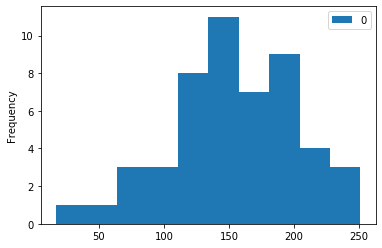

In [16]:
## histogram
pd.DataFrame(olcumler).plot.hist();

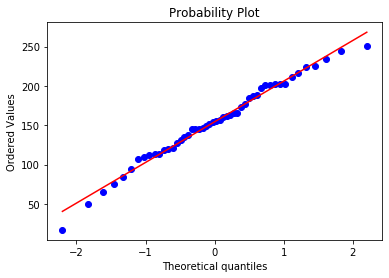

In [11]:
## qqplot
import pylab
stats.probplot(olcumler,dist="norm",plot=pylab)
pylab.show()

#### Shapiro-Wilks Testi
H0: Örnek dağılımı ile teorik dağılım arasında ist. ol. an. bir fark. yoktur.<br>
H1: ... fark vardır.

In [12]:
from scipy.stats import shapiro

shapiro(olcumler)

(0.9855668544769287, 0.7956817746162415)

sol değer: test istatisiğini ifade ediyor.<br>
sağ değer: pvalue değerini ifade ediyor.

Kısaca pvalue değeri 0.5 değerinde küçükse ifadeyi red ederiz. Yukarıda ki örnekte ki pvalue değerine baktığımızda 0.8 olduğunu görmekteyiz. Yani değer red edilmez, kabul edilir.

### Hipotez tesi uygulanması
Varsayım kabul edildiği için hipotez testine geçilebilir.

In [13]:
stats.ttest_1samp(olcumler,popmean=170)

Ttest_1sampResult(statistic=-2.1799761930490753, pvalue=0.034092667081787736)

pvalue değeri 0.5ten küçük olduğu için hipotez red edilir. Yani web sitemizde geçirilen ortlama süre 170 saniye değilidr.

## Nanparemtrik Tek Örneklem Testi

In [14]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(olcumler,170)

(-7.0, 0.06490864707227219)